In [ ]:
import pandas as pd

path_train = '/content/drive/MyDrive/NID/train.csv'
path_test = '/content/drive/MyDrive/NID/test.csv'

train = pd.read_csv(path_train)
train.drop(['extra'], axis = 1, inplace = True)
test = pd.read_csv(path_test)
test.drop(['extra'], axis = 1, inplace = True)

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
vals = train['class'].value_counts()
type(vals)

pandas.core.series.Series

In [ ]:
train['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = train[categorical_columns]

testdf_categorical_values = test[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


#Data Pre prcoessing

In [ ]:
unique_protocol=sorted(train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# For service
unique_service=sorted(train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

# For flag
unique_flag=sorted(train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

# do same for test set
unique_service_test=sorted(test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [ ]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [ ]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)

# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
trainservice=train['service'].tolist()
testservice= test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_harvest',
 'service_http_2784',
 'service_urh_i',
 'service_red_i',
 'service_http_8001']

In [ ]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

In [ ]:
new_train=train.join(df_cat_data)
new_train.drop('flag', axis=1, inplace=True)
new_train.drop('protocol_type', axis=1, inplace=True)
new_train.drop('service', axis=1, inplace=True)

# test data
new_test=test.join(testdf_cat_data)
new_test.drop('flag', axis=1, inplace=True)
new_test.drop('protocol_type', axis=1, inplace=True)
new_test.drop('service', axis=1, inplace=True)
print(new_train.shape)
print(new_test.shape)

(125973, 123)
(22544, 123)


In [ ]:
labeldf_train=new_train['class']
labeldf_test=new_test['class']

# change the label column
newlabeldf=labeldf_train.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

# put the new label column back
new_train['class'] = newlabeldf
new_test['class'] = newlabeldf_test

print(new_train['class'].head())

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64


In [ ]:
new_train.to_csv('new_NID_train.csv')
new_test.to_csv('new_NID_test.csv')

In [ ]:
drop_all = [1, 2, 3, 4]
retain_R2L = [0, 1, 2, 4]

zero_sample = new_train[~new_train['class'].isin(drop_all)]
R2L_sample = new_train[~new_train['class'].isin(retain_R2L)]

new_R2L = pd.concat([zero_sample.sample(1000), R2L_sample])

In [ ]:
drop_all = [1, 2, 3, 4]
retain_U2R = [0, 1, 2, 3]

zero_sample = new_train[~new_train['class'].isin(drop_all)]
U2R_sample = new_train[~new_train['class'].isin(retain_U2R)]

new_U2R = pd.concat([zero_sample.sample(100), U2R_sample])

In [ ]:
new_U2R['class']

85799     0
104980    0
12169     0
67110     0
28033     0
         ..
113266    4
117341    4
118838    4
120195    4
120498    4
Name: class, Length: 152, dtype: int64

In [ ]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]

# create dtafame accorrding to level dype for trining data
DoS_df=new_train[~new_train['class'].isin(to_drop_DoS)];
Probe_df=new_train[~new_train['class'].isin(to_drop_Probe)];
R2L_df=new_train[~new_train['class'].isin(to_drop_R2L)];
U2R_df=new_train[~new_train['class'].isin(to_drop_U2R)];

#create dtafame accorrding to level type for testing data
DoS_df_test=new_test[~new_test['class'].isin(to_drop_DoS)];
Probe_df_test=new_test[~new_test['class'].isin(to_drop_Probe)];
R2L_df_test=new_test[~new_test['class'].isin(to_drop_R2L)];
U2R_df_test=new_test[~new_test['class'].isin(to_drop_U2R)];

print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


In [ ]:
new_test['class'].value_counts()

0    9711
1    7460
3    2885
2    2421
4      67
Name: class, dtype: int64

In [ ]:
new_train['class'].value_counts()

0    67343
1    45927
2    11656
3      995
4       52
Name: class, dtype: int64

In [ ]:
X_DoS = DoS_df.drop('class',1)
Y_DoS = DoS_df['class']
X_Probe = Probe_df.drop('class',1)
Y_Probe = Probe_df['class']
X_R2L = R2L_df.drop('class',1)
Y_R2L = R2L_df['class']
X_U2R = U2R_df.drop('class',1)
Y_U2R = U2R_df['class']

# test set
X_DoS_test = DoS_df_test.drop('class',1)
Y_DoS_test = DoS_df_test['class']
X_Probe_test = Probe_df_test.drop('class',1)
Y_Probe_test = Probe_df_test['class']
X_R2L_test = R2L_df_test.drop('class',1)
Y_R2L_test = R2L_df_test['class']
X_U2R_test = U2R_df_test.drop('class',1)
Y_U2R_test = U2R_df_test['class']

<ipython-input-12-10089b37c022>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS = DoS_df.drop('class',1)
<ipython-input-12-10089b37c022>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Probe = Probe_df.drop('class',1)
<ipython-input-12-10089b37c022>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_R2L = R2L_df.drop('class',1)
<ipython-input-12-10089b37c022>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_U2R = U2R_df.drop('class',1)
<ipython-input-12-10089b37c022>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS_test = DoS_df_test.d

In [ ]:
colNames= list(new_train.drop(['class'], axis = 1))
colNames_test=list(new_test.drop(['class'], axis = 1))

In [ ]:
from sklearn import preprocessing

# For train data set
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)

# For test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

#Feature Extraction

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import joblib

clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=30, step=1)

#for DoS
rfe.fit(X_DoS, Y_DoS)
joblib.dump(rfe, 'DoS_feature_transform.joblib')
X_rfeDoS=rfe.transform(X_DoS)
X_rfeDoS_test = rfe.transform(X_DoS_test)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

#for Probe
rfe.fit(X_Probe, Y_Probe)
joblib.dump(rfe, 'Probe_feature_transform.joblib')
X_rfeProbe=rfe.transform(X_Probe)
X_rfeProbe_test = rfe.transform(X_Probe_test)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)

#for R2L
rfe.fit(X_R2L, Y_R2L)
joblib.dump(rfe, 'R2L_feature_transform.joblib')
X_rfeR2L=rfe.transform(X_R2L)
X_rfeR2L_test = rfe.transform(X_R2L_test)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

#for U2R
rfe.fit(X_U2R, Y_U2R)
joblib.dump(rfe, 'U2R_feature_transform.joblib')
X_rfeU2R=rfe.transform(X_U2R)
X_rfeU2R_test = rfe.transform(X_U2R_test)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

In [ ]:
print('Features selected for DoS:',rfecolname_DoS)
print()
print('Features selected for Probe:',rfecolname_Probe)
print()
print('Features selected for R2L:',rfecolname_R2L)
print()
print('Features selected for U2R:',rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'service_ecr_i', 'service_private', 'service_telnet', 'service_tftp_u', 'service_tim_i', 'flag_OTH', 'flag_RSTR', 'flag_S0']

Features selected for Probe: ['duration', 'src_bytes', 'dst_bytes', 'count', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'service_IRC', 'service_X11', 'service_auth', 'service_domain_u', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_http', 'service_other', 'service_pm_dump', 's

#EDA

In [ ]:
common_features = set(rfecolname_DoS).intersection(rfecolname_Probe, rfecolname_R2L, rfecolname_U2R)

print(common_features)

{'dst_host_same_srv_rate', 'dst_host_count', 'src_bytes', 'dst_host_srv_count', 'dst_bytes'}


In [ ]:
all_feat = rfecolname_DoS[:15] + rfecolname_Probe[:15] + rfecolname_R2L[:15] + rfecolname_U2R[:15]

union_feat = set(all_feat)
print(len(union_feat))

30


In [ ]:
sub_data = new_train[union_feat]

imp_data = new_train[common_features]

<ipython-input-20-906a912686a4>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub_data = new_train[union_feat]
<ipython-input-20-906a912686a4>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  imp_data = new_train[common_features]


<ipython-input-21-95fc3cf73d19>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  g=sns.heatmap(new_train[common_features].corr(),annot=True,cmap="RdYlGn")


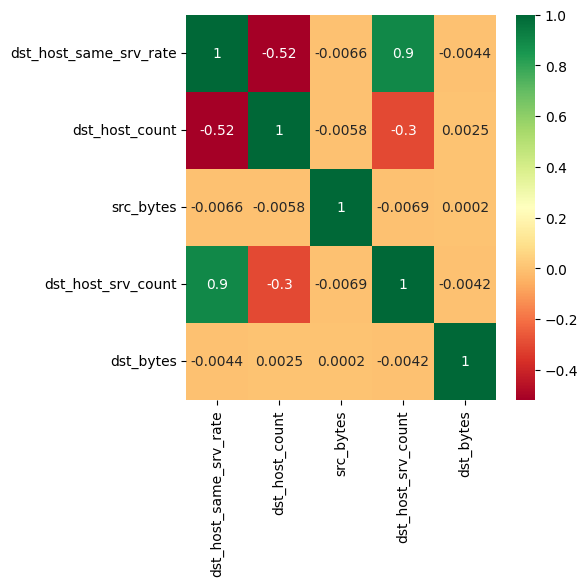

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5,5))
g=sns.heatmap(new_train[common_features].corr(),annot=True,cmap="RdYlGn")

<ipython-input-22-f06eabb67a42>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  g=sns.heatmap(new_train[union_feat].corr(),annot=True,cmap="RdYlGn")


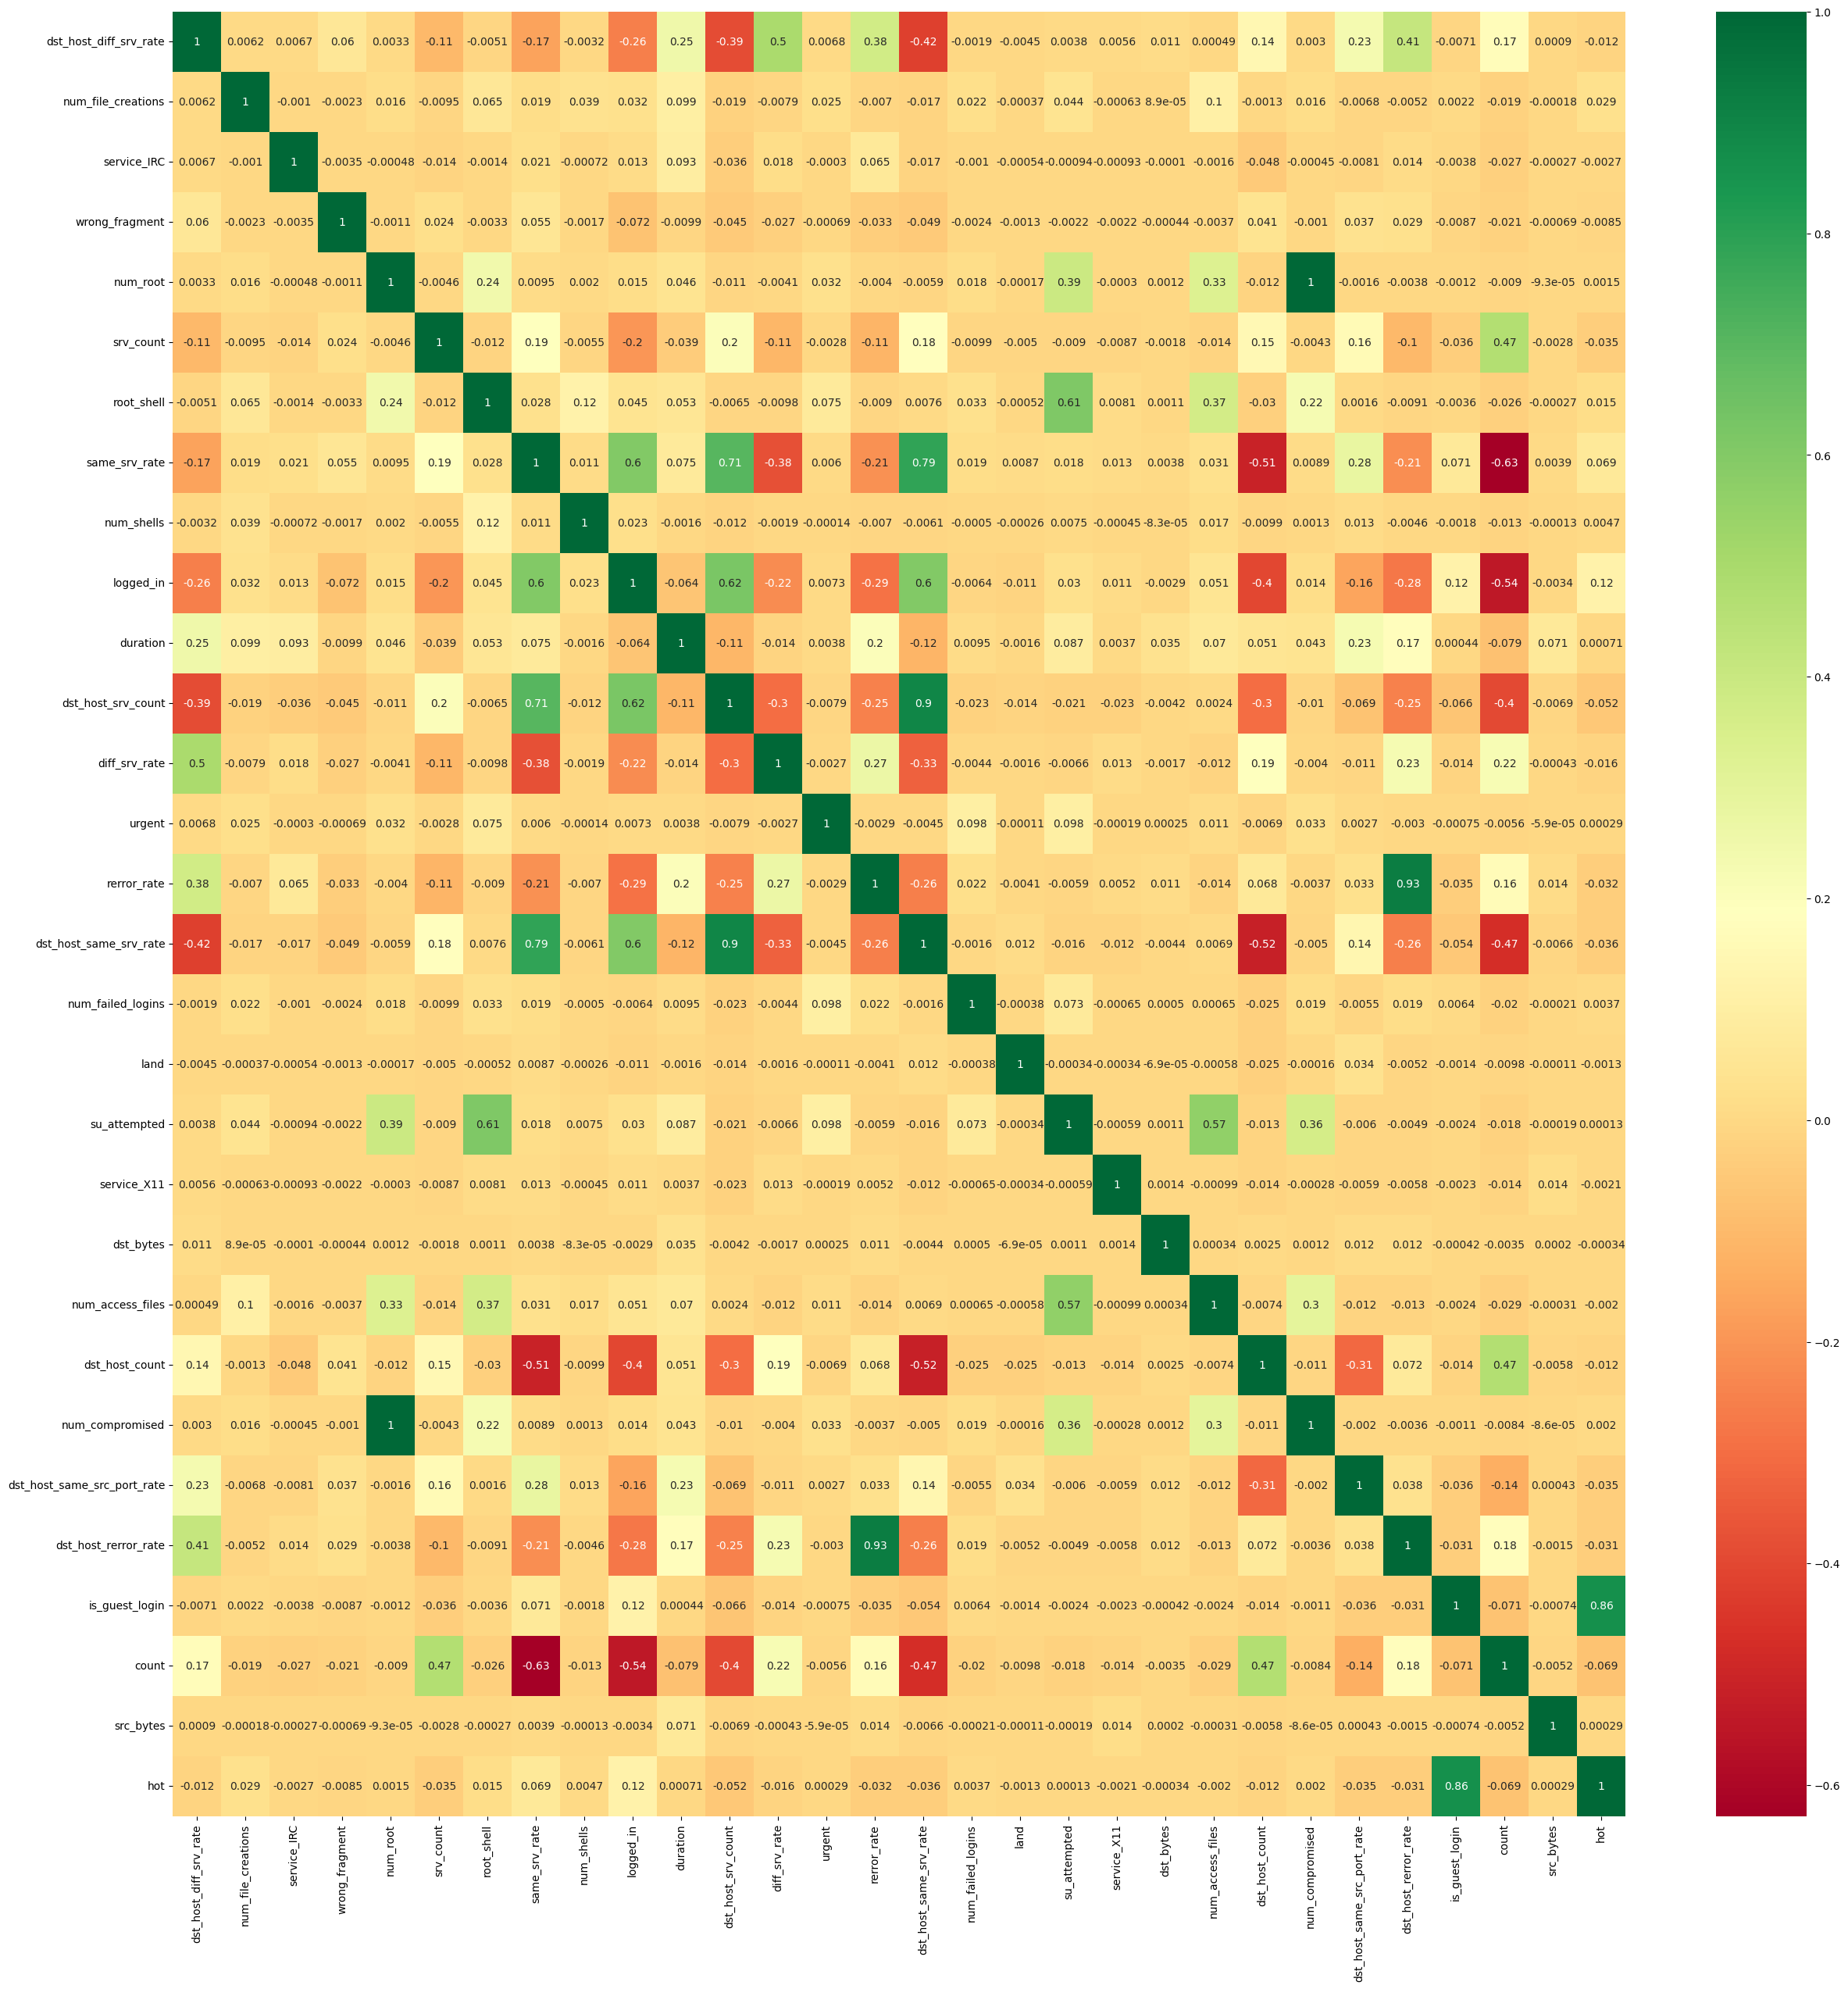

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (30,30))
g=sns.heatmap(new_train[union_feat].corr(),annot=True,cmap="RdYlGn")

In [ ]:
print(X_rfeDoS.shape, X_rfeDoS_test.shape)
print(X_rfeProbe.shape, X_rfeProbe_test.shape)
print(X_rfeR2L.shape, X_rfeR2L_test.shape)
print(X_rfeU2R.shape, X_rfeU2R_test.shape)

(113270, 30) (17171, 30)
(78999, 30) (12132, 30)
(68338, 30) (12596, 30)
(67395, 30) (9778, 30)


In [ ]:
(Y_R2L_test==3).sum()

2885

In [ ]:
import pandas as pd

def change_column_order(source_df, target_df):
    # Get the header/column names of the source DataFrame
    source_columns = list(source_df.columns)

    # Reorder the columns in the target DataFrame based on the source DataFrame's header
    reordered_target_df = target_df[source_columns]

    return reordered_target_df


In [ ]:
new_test_altered = change_column_order(new_train, new_test)

#General Model Training

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import joblib

new_train_data = new_train.drop(['class'], axis = 1)
new_train_label = new_train['class']

new_test_data = new_test_altered.drop(['class'], axis = 1)
new_test_label = new_test_altered['class']

clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=30, step=1)

rfe.fit(new_train_data, new_train_label)
joblib.dump(rfe, 'General_feature_transform.joblib')
imp_train_data = rfe.transform(new_train_data)
imp_test_data = rfe.transform(new_test_data)
true=rfe.support_
rfecolindex_new_train=[i for i, x in enumerate(true) if x]
rfecolname_new_train=list(colNames[i] for i in rfecolindex_new_train)

KeyboardInterrupt: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Assuming you have already loaded your dataset into X_train, y_train, X_val, y_val, X_test, y_test

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if your labels are integers
              optimizer=optimizer,
              metrics=['accuracy'])

# Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(imp_train_data, new_train_label,
                    epochs=10,  # Adjust as needed
                    batch_size=128)  # Adjust as needed
                    # validation_data=(X_val, y_val),
                    # callbacks=[early_stopping])
model.save('General_model.keras')

In [ ]:
test_loss, test_accuracy = model.evaluate(imp_test_data, new_test_label)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

preds = model.predict(imp_test_data)
pred_label = preds.argmax(axis = 1)
f1 = f1_score(new_test_label.tolist(), pred_label, average = None)
acc = accuracy_score(new_test_label.tolist(), pred_label)
conf_mat = confusion_matrix(new_test_label.tolist(), pred_label)
print(f1, '\n',acc, '\n',conf_mat)

In [ ]:
D_tree = DecisionTreeClassifier(random_state=0)
D_tree.fit(imp_train_data, new_train_label)
Tree_preds = D_tree.predict(imp_test_data)
f1 = f1_score(new_test_label.tolist(), Tree_preds, average = None)
acc = accuracy_score(new_test_label.tolist(), Tree_preds)
print(f1, acc)

# Model Training DoS

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Assuming you have already loaded your dataset into X_train, y_train, X_val, y_val, X_test, y_test

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if your labels are integers
              optimizer=optimizer,
              metrics=['accuracy'])

# Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(X_rfeDoS, Y_DoS,
                    epochs=5,  # Adjust as needed
                    batch_size=128)  # Adjust as needed
                    # validation_data=(X_val, y_val),
                    # callbacks=[early_stopping])
model.save('DoS.keras')

Epoch 1/5
885/885 [==============================] - 14s 5ms/step - loss: 0.0624 - accuracy: 0.9901
Epoch 2/5
885/885 [==============================] - 4s 4ms/step - loss: 0.0100 - accuracy: 0.9973
Epoch 3/5
885/885 [==============================] - 4s 4ms/step - loss: 0.0075 - accuracy: 0.9975
Epoch 4/5
885/885 [==============================] - 12s 13ms/step - loss: 0.0060 - accuracy: 0.9979
Epoch 5/5
885/885 [==============================] - 10s 11ms/step - loss: 0.0044 - accuracy: 0.9987


In [ ]:
test_loss, test_accuracy = model.evaluate(X_rfeDoS_test, Y_DoS_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

537/537 [==============================] - 1s 2ms/step - loss: 0.8408 - accuracy: 0.8766
Test Accuracy: 87.66%


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score

preds = model.predict(X_rfeDoS_test)
pred_label = preds.argmax(axis = 1)
f1 = f1_score(Y_DoS_test.tolist(), pred_label)
acc = accuracy_score(Y_DoS_test.tolist(), pred_label)
conf_mat = confusion_matrix(Y_DoS_test.tolist(), pred_label)
prcs = precision_score(Y_DoS_test.tolist(), pred_label)
rec = recall_score(Y_DoS_test.tolist(), pred_label)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

537/537 [==============================] - 4s 7ms/step
0.8360541586073501 
 0.8765942577601771 
 [[9649   62]
 [2057 5403]]
0.9886550777676121 0.7242627345844505


In [ ]:
import joblib

In [ ]:
D_tree = DecisionTreeClassifier(random_state=0)
D_tree.fit(X_rfeDoS, Y_DoS)
Tree_preds = D_tree.predict(X_rfeDoS_test)
# f1 = f1_score(Y_DoS_test.tolist(), Tree_preds)
# acc = accuracy_score(Y_DoS_test.tolist(), Tree_preds)
# # joblib.dump(D_tree, 'DosDtree.joblib')
# print(f1, acc)
f1 = f1_score(Y_DoS_test.tolist(), Tree_preds)
acc = accuracy_score(Y_DoS_test.tolist(), Tree_preds)
conf_mat = confusion_matrix(Y_DoS_test.tolist(), Tree_preds)
prcs = precision_score(Y_DoS_test.tolist(), Tree_preds)
rec = recall_score(Y_DoS_test.tolist(), Tree_preds)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.7609976592138187 
 0.8275580921320832 
 [[9496  215]
 [2746 4714]]
0.9563806045851085 0.6319034852546916


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_rfeDoS, Y_DoS)
forest_preds = forest.predict(X_rfeDoS_test)
# f1 = f1_score(Y_DoS_test.tolist(), forest_preds)
# acc = accuracy_score(Y_DoS_test.tolist(), forest_preds)
# print(f1, acc)
f1 = f1_score(Y_DoS_test.tolist(), forest_preds)
acc = accuracy_score(Y_DoS_test.tolist(), forest_preds)
conf_mat = confusion_matrix(Y_DoS_test.tolist(), forest_preds)
prcs = precision_score(Y_DoS_test.tolist(), forest_preds)
rec = recall_score(Y_DoS_test.tolist(), forest_preds)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.7590540764015213 
 0.8302952652728437 
 [[9667   44]
 [2870 4590]]
0.990504963314631 0.6152815013404825


In [ ]:
from sklearn import svm

svm_cl = svm.SVC()
svm_cl.fit(X_rfeDoS, Y_DoS)
svm_pred = svm_cl.predict(X_rfeDoS_test)
# acc = accuracy_score(Y_DoS_test.tolist(), svm_pred)
# f1 = f1_score(Y_DoS_test.tolist(), svm_pred)
# print(acc, f1)
f1 = f1_score(Y_DoS_test.tolist(), svm_pred)
acc = accuracy_score(Y_DoS_test.tolist(), svm_pred)
conf_mat = confusion_matrix(Y_DoS_test.tolist(), svm_pred)
prcs = precision_score(Y_DoS_test.tolist(), svm_pred)
rec = recall_score(Y_DoS_test.tolist(), svm_pred)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.8125694334232663 
 0.8624424902451808 
 [[9689   22]
 [2340 5120]]
0.9957215091404122 0.6863270777479893


# Model Train Probe

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(X_rfeProbe, Y_Probe,
                    epochs=10,
                    batch_size=128)
model.save('Probe.keras')

Epoch 1/10
618/618 [==============================] - 19s 14ms/step - loss: 0.4039 - accuracy: 0.9333
Epoch 2/10
618/618 [==============================] - 12s 19ms/step - loss: 0.0656 - accuracy: 0.9920
Epoch 3/10
618/618 [==============================] - 10s 17ms/step - loss: 0.0360 - accuracy: 0.9928
Epoch 4/10
618/618 [==============================] - 9s 14ms/step - loss: 0.0298 - accuracy: 0.9932
Epoch 5/10
618/618 [==============================] - 5s 8ms/step - loss: 0.0231 - accuracy: 0.9948
Epoch 6/10
618/618 [==============================] - 8s 13ms/step - loss: 0.0193 - accuracy: 0.9955
Epoch 7/10
618/618 [==============================] - 6s 9ms/step - loss: 0.0168 - accuracy: 0.9958
Epoch 8/10
618/618 [==============================] - 4s 6ms/step - loss: 0.0201 - accuracy: 0.9944
Epoch 9/10
618/618 [==============================] - 6s 10ms/step - loss: 0.0165 - accuracy: 0.9956
Epoch 10/10
618/618 [==============================] - 4s 6ms/step - loss: 0.0144 - accurac

In [ ]:
test_loss, test_accuracy = model.evaluate(X_rfeProbe_test, Y_Probe_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

380/380 [==============================] - 1s 2ms/step - loss: 0.6276 - accuracy: 0.8703
Test Accuracy: 87.03%


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score

preds = model.predict(X_rfeProbe_test)
pred_label = preds.argmax(axis = 1)
f1 = f1_score(Y_Probe_test.tolist(), pred_label, pos_label = 2)
acc = accuracy_score(Y_Probe_test.tolist(), pred_label)
conf_mat = confusion_matrix(Y_Probe_test.tolist(), pred_label)
prcs = precision_score(Y_Probe_test.tolist(), pred_label, pos_label = 2)
rec = recall_score(Y_Probe_test.tolist(), pred_label, pos_label = 2)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

380/380 [==============================] - 1s 3ms/step
0.6573731213243302 
 0.8703428948236069 
 [[9050  661]
 [ 912 1509]]
0.6953917050691244 0.6232961586121437


In [ ]:
D_tree = DecisionTreeClassifier(random_state=0)
D_tree.fit(X_rfeProbe, Y_Probe)
Tree_preds = D_tree.predict(X_rfeProbe_test)
# f1 = f1_score(Y_Probe_test.tolist(), Tree_preds, pos_label = 2)
# acc = accuracy_score(Y_Probe_test.tolist(), Tree_preds)
# print(f1, acc)
f1 = f1_score(Y_Probe_test.tolist(), Tree_preds, pos_label = 2)
acc = accuracy_score(Y_Probe_test.tolist(), Tree_preds)
conf_mat = confusion_matrix(Y_Probe_test.tolist(), Tree_preds)
prcs = precision_score(Y_Probe_test.tolist(), Tree_preds, pos_label = 2)
rec = recall_score(Y_Probe_test.tolist(), Tree_preds, pos_label = 2)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.3720930232558139 
 0.37908011869436203 
 [[2367 7344]
 [ 189 2232]]
0.23308270676691728 0.9219330855018587


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_rfeProbe, Y_Probe)
forest_preds = forest.predict(X_rfeProbe_test)
# f1 = f1_score(Y_Probe_test.tolist(), forest_preds, pos_label = 2)
# acc = accuracy_score(Y_Probe_test.tolist(), forest_preds)
# conf_mat = confusion_matrix(Y_Probe_test.tolist(), pred_label)
# print(f1, acc)
f1 = f1_score(Y_Probe_test.tolist(), forest_preds, pos_label = 2)
acc = accuracy_score(Y_Probe_test.tolist(), forest_preds)
conf_mat = confusion_matrix(Y_Probe_test.tolist(), forest_preds)
prcs = precision_score(Y_Probe_test.tolist(), forest_preds, pos_label = 2)
rec = recall_score(Y_Probe_test.tolist(), forest_preds, pos_label = 2)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.584753787878788 
 0.8554236729310913 
 [[9143  568]
 [1186 1235]]
0.684969495285635 0.510119785212722


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn import svm

svm_cl = svm.SVC()
svm_cl.probability = True
svm_cl.fit(X_rfeProbe, Y_Probe)
svm_pred = svm_cl.predict(X_rfeProbe_test)
# acc = accuracy_score(Y_Probe_test.tolist(), svm_pred)
# f1 = f1_score(Y_Probe_test.tolist(), svm_pred, pos_label = 2)
# conf_mat = confusion_matrix(Y_Probe_test.tolist(), svm_pred)
# joblib.dump(svm_cl,'Probe_svm_prob.joblib')
# print(acc, f1, conf_mat)
f1 = f1_score(Y_Probe_test.tolist(), svm_pred, pos_label = 2)
acc = accuracy_score(Y_Probe_test.tolist(), svm_pred)
conf_mat = confusion_matrix(Y_Probe_test.tolist(), svm_pred)
prcs = precision_score(Y_Probe_test.tolist(), svm_pred, pos_label = 2)
rec = recall_score(Y_Probe_test.tolist(), svm_pred, pos_label = 2)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.7113729043951065 
 0.8949884602703594 
 [[9288  423]
 [ 851 1570]]
0.7877571500250878 0.6484923585295332


In [ ]:
joblib.dump(svm_cl,'Probe_svm.joblib')

['Probe_svm.joblib']

# Model Training R2L

In [ ]:
from joblib import load

trnsf = load('/content/R2L_feature_transform.joblib')
train_R2L_data = trnsf.transform(new_R2L.drop(['class'], axis = 1))
train_R2L_label = new_R2L['class']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

train_R2L_label = train_R2L_label.replace(3,1)

model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(train_R2L_data, train_R2L_label,
                    epochs=10,
                    batch_size=40)
model.save('R2L_downsampled.keras')

Epoch 1/10
50/50 [==============================] - 6s 8ms/step - loss: 0.6497 - accuracy: 0.6917
Epoch 2/10
50/50 [==============================] - 0s 9ms/step - loss: 0.5241 - accuracy: 0.7704
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4883 - accuracy: 0.7890
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4133 - accuracy: 0.8336
Epoch 5/10
50/50 [==============================] - 0s 8ms/step - loss: 0.3998 - accuracy: 0.8321
Epoch 6/10
50/50 [==============================] - 0s 8ms/step - loss: 0.3772 - accuracy: 0.8516
Epoch 7/10
50/50 [==============================] - 0s 8ms/step - loss: 0.3674 - accuracy: 0.8566
Epoch 8/10
50/50 [==============================] - 0s 8ms/step - loss: 0.3661 - accuracy: 0.8496
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.3219 - accuracy: 0.8732
Epoch 10/10
50/50 [==============================] - 0s 7ms/step - loss: 0.3171 - accuracy: 0.8807


In [ ]:
test_loss, test_accuracy = model.evaluate(X_rfeR2L_test, Y_R2L_test.replace(3,1))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

394/394 [==============================] - 1s 2ms/step - loss: 0.7768 - accuracy: 0.7707
Test Accuracy: 77.07%


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

preds = model.predict(X_rfeR2L_test)
pred_label = preds.argmax(axis = 1)
# f1 = f1_score(Y_R2L_test.replace(3,1).tolist(), pred_label)
# acc = accuracy_score(Y_R2L_test.tolist(), pred_label)
# conf_mat = confusion_matrix(Y_R2L_test.replace(3,1).tolist(), pred_label)
# print(f1, '\n',acc, '\n',conf_mat)
f1 = f1_score(Y_R2L_test.replace(3,1).tolist(), pred_label)
acc = accuracy_score(Y_R2L_test.replace(3,1).tolist(), pred_label)
conf_mat = confusion_matrix(Y_R2L_test.replace(3,1).tolist(), pred_label)
prcs = precision_score(Y_R2L_test.replace(3,1).tolist(), pred_label)
rec = recall_score(Y_R2L_test.replace(3,1).tolist(), pred_label)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

394/394 [==============================] - 2s 3ms/step
0.010281014393420152 
 0.770720863766275 
 [[9693   18]
 [2870   15]]
0.45454545454545453 0.005199306759098787


In [ ]:
D_tree = DecisionTreeClassifier(random_state=0)
D_tree.fit(train_R2L_data, train_R2L_label)
Tree_preds = D_tree.predict(X_rfeR2L_test)
# f1 = f1_score(Y_R2L_test.replace(3,1).tolist(), Tree_preds)
# acc = accuracy_score(Y_R2L_test.replace(3,1).tolist(), Tree_preds)
# joblib.dump(D_tree, 'Dtree_R2L.joblib')
# print(f1, acc)
f1 = f1_score(Y_R2L_test.replace(3,1).tolist(), Tree_preds)
acc = accuracy_score(Y_R2L_test.replace(3,1).tolist(), Tree_preds)
conf_mat = confusion_matrix(Y_R2L_test.replace(3,1).tolist(), Tree_preds)
prcs = precision_score(Y_R2L_test.replace(3,1).tolist(), Tree_preds)
rec = recall_score(Y_R2L_test.replace(3,1).tolist(), Tree_preds)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.2841214123477183 
 0.7247538901238488 
 [[8441 1270]
 [2197  688]]
0.35137895812053116 0.23847487001733103


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(train_R2L_data, train_R2L_label)
forest_preds = forest.predict(X_rfeR2L_test)
# f1 = f1_score(Y_R2L_test.tolist(), forest_preds, pos_label = 3)
# acc = accuracy_score(Y_R2L_test.tolist(), forest_preds)
# print(f1, acc)
f1 = f1_score(Y_R2L_test.replace(3,1).tolist(), forest_preds)
acc = accuracy_score(Y_R2L_test.replace(3,1).tolist(), forest_preds)
conf_mat = confusion_matrix(Y_R2L_test.replace(3,1).tolist(), forest_preds)
prcs = precision_score(Y_R2L_test.replace(3,1).tolist(), forest_preds)
rec = recall_score(Y_R2L_test.replace(3,1).tolist(), forest_preds)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.2033169533169533 
 0.7940616068593204 
 [[9671   40]
 [2554  331]]
0.8921832884097035 0.1147313691507799


In [ ]:
from sklearn import svm

svm_cl = svm.SVC()
svm_cl.fit(train_R2L_data, train_R2L_label)
svm_pred = svm_cl.predict(X_rfeR2L_test)
# acc = accuracy_score(Y_R2L_test.tolist(), svm_pred)
# f1 = f1_score(Y_R2L_test.tolist(), svm_pred, pos_label = 3)
# conf_mat = confusion_matrix(Y_R2L_test.tolist(), svm_pred)
# print(acc, f1, conf_mat)
f1 = f1_score(Y_R2L_test.replace(3,1).tolist(), svm_pred)
acc = accuracy_score(Y_R2L_test.replace(3,1).tolist(), svm_pred)
conf_mat = confusion_matrix(Y_R2L_test.replace(3,1).tolist(), svm_pred)
prcs = precision_score(Y_R2L_test.replace(3,1).tolist(), svm_pred)
rec = recall_score(Y_R2L_test.replace(3,1).tolist(), svm_pred)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.0 
 0.7709590346141633 
 [[9711    0]
 [2885    0]]
0.0 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Model Training U2R

In [ ]:
from joblib import load

trn = load('/content/U2R_feature_transform.joblib')

U2R_data = trn.transform(new_U2R.drop(['class'], axis = 1))

U2R_label = new_U2R['class'].replace(4,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(U2R_data, U2R_label,
                    epochs=15,
                    batch_size=16)
model.save('U2R_downsampled.keras')

Epoch 1/15
10/10 [==============================] - 4s 4ms/step - loss: 1.0374 - accuracy: 0.5263
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 0.8094 - accuracy: 0.6184
Epoch 3/15
10/10 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.7171
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 0.5906 - accuracy: 0.7368
Epoch 5/15
10/10 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7632
Epoch 6/15
10/10 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.8487
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 0.4617 - accuracy: 0.7895
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 0.4345 - accuracy: 0.8092
Epoch 9/15
10/10 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8092
Epoch 10/15
10/10 [==============================] - 0s 4ms/step - loss: 0.3040 - accuracy: 0.9013
Epoch 11/15
10/10 [

In [ ]:
test_loss, test_accuracy = model.evaluate(X_rfeU2R_test, Y_U2R_test.replace(4,1))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

306/306 [==============================] - 1s 2ms/step - loss: 0.4065 - accuracy: 0.9916
Test Accuracy: 99.16%


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

preds = model.predict(X_rfeU2R_test)
pred_label = preds.argmax(axis = 1)
# f1 = f1_score(Y_U2R_test.replace(4,1).tolist(), pred_label)
# acc = accuracy_score(Y_U2R_test.replace(4,1).tolist(), pred_label)
# conf_mat = confusion_matrix(Y_U2R_test.replace(4,1).tolist(), pred_label)
# print(f1, '\n',acc, '\n',conf_mat)
f1 = f1_score(Y_U2R_test.replace(4,1).tolist(), pred_label)
acc = accuracy_score(Y_U2R_test.replace(4,1).tolist(), pred_label)
conf_mat = confusion_matrix(Y_U2R_test.replace(4,1).tolist(), pred_label)
prcs = precision_score(Y_U2R_test.replace(4,1).tolist(), pred_label)
rec = recall_score(Y_U2R_test.replace(4,1).tolist(), pred_label)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

306/306 [==============================] - 1s 3ms/step
0.06818181818181818 
 0.9916138269584782 
 [[9693   18]
 [  64    3]]
0.14285714285714285 0.04477611940298507


In [ ]:
D_tree = DecisionTreeClassifier(random_state=0)
D_tree.fit(U2R_data, U2R_label)
Tree_preds = D_tree.predict(X_rfeU2R_test)
# f1 = f1_score(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
# acc = accuracy_score(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
# #joblib.dump(D_tree, 'Dtree_U2R.joblib')
# print(f1, acc)
f1 = f1_score(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
acc = accuracy_score(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
conf_mat = confusion_matrix(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
prcs = precision_score(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
rec = recall_score(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.013610970035551041 
 0.0068521169973409695 
 [[   0 9711]
 [   0   67]]
0.0068521169973409695 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(U2R_data, U2R_label)
forest_preds = forest.predict(X_rfeU2R_test)
# f1 = f1_score(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
# acc = accuracy_score(Y_U2R_test.replace(4,1).tolist(), Tree_preds)
# print(f1, acc)
f1 = f1_score(Y_U2R_test.replace(4,1).tolist(), forest_preds)
acc = accuracy_score(Y_U2R_test.replace(4,1).tolist(), forest_preds)
conf_mat = confusion_matrix(Y_U2R_test.replace(4,1).tolist(), forest_preds)
prcs = precision_score(Y_U2R_test.replace(4,1).tolist(), forest_preds)
rec = recall_score(Y_U2R_test.replace(4,1).tolist(), forest_preds)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.013610970035551041 
 0.0068521169973409695 
 [[   0 9711]
 [   0   67]]
0.0068521169973409695 1.0


In [ ]:
from sklearn import svm

svm_cl = svm.SVC()
svm_cl.fit(U2R_data, U2R_label)
svm_pred = svm_cl.predict(X_rfeU2R_test)
# acc = accuracy_score(Y_U2R_test.tolist(), svm_pred)
# f1 = f1_score(Y_U2R_test.tolist(), svm_pred, pos_label = 4)
# conf_mat = confusion_matrix(Y_U2R_test.tolist(), svm_pred)
# print(acc, f1, conf_mat)
f1 = f1_score(Y_U2R_test.replace(4,1).tolist(), svm_pred)
acc = accuracy_score(Y_U2R_test.replace(4,1).tolist(), svm_pred)
conf_mat = confusion_matrix(Y_U2R_test.replace(4,1).tolist(), svm_pred)
prcs = precision_score(Y_U2R_test.replace(4,1).tolist(), svm_pred)
rec = recall_score(Y_U2R_test.replace(4,1).tolist(), svm_pred)
print(f1, '\n',acc, '\n',conf_mat)
print(prcs, rec)

0.0 
 0.993147883002659 
 [[9711    0]
 [  67    0]]
0.0 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#New Architecture

In [ ]:
from keras.models import load_model
from joblib import load

model_for_dos = load_model('/content/DoS.keras')
model_for_probe = load('/content/Probe_svm.joblib')
model_for_R2L = load_model('/content/R2L.keras')
model_for_U2R = load('/content/Dtree_U2R.joblib')

In [ ]:
transform_for_dos = load('/content/DoS_feature_transform.joblib')
transform_for_probe = load('/content/Probe_feature_transform.joblib')
transform_for_U2R = load('/content/U2R_feature_transform.joblib')
transform_for_R2L = load('/content/R2L_feature_transform.joblib')

In [ ]:
data1 = transform_for_dos.transform(new_test.drop(['class'], axis = 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


AttributeError: ignored